# EDA on tweets with wrapper and twitter API

<img src = 'https://www.axelspringer.com/data/uploads/2018/06/Twitter-Logo-Inverted.png' height = 500 width = 1000>

## __Introduction__

- ### The main goal of this analysis is extract the data on the "savetheplanet" using the twitter API.
- ### For extracting the data python wrapper "Twython" is used here.
- ### After extracting the data further analysis is done on the data like tweet source, time, day.
- ### Additionally in this "TextBlob" library is used to identify the subjectivity and polarity of the tweet.

### In this Project mainly used libraries are pandas, seaborn, matplot, NLTK, wordcloud, TextBlob, re, Numpy

## __1. Basic setup__

In [160]:
# installing the twython wrapper
!pip install twython

In [161]:
from twython import Twython
from credentials import *
from OAUTH import *
twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET_KEY,OAUTH_TOKEN,OAUTH_TOKEN_SECRET)
import re

## __2. Extracting the data using the wrapper__

In [162]:
results = twitter.cursor(twitter.search,q ='#savetheplanet', lang = 'en', result_type = 'mixed', count = 500, tweet_mode = 'extended')

In [163]:
data = []
for result in results:
    data.append(result)

In [164]:
import pandas as pd

## __3. Creating the dataframe__

In [165]:
df = pd.json_normalize(data)

In [166]:
df.head(2)

,created_at,id,id_str,full_text,truncated,display_text_range,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,quoted_status.place.id,quoted_status.place.url,quoted_status.place.place_type,quoted_status.place.name,quoted_status.place.full_name,quoted_status.place.country_code,quoted_status.place.country,quoted_status.place.contained_within,quoted_status.place.bounding_box.type,quoted_status.place.bounding_box.coordinates
0,Wed Nov 24 11:08:47 +0000 2021,1463464609147498507,1463464609147498507,Beautiful 💝💝 #FaisalMasjid #Islamabad but visi...,False,"[0, 180]","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sun Nov 28 18:41:24 +0000 2021,1465028067705999360,1465028067705999360,RT @ClubTrp: O dear humans! We are on the brin...,False,"[0, 140]","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## __4. Making a dataframe with useful information__

In [167]:
df1 = df.iloc[:, [0, 1,3,6,35,41,42,45]]

## __5. Basic Analysis__

In [168]:
# initially converting the object to datatime type
df1['created_at'] = pd.to_datetime(df1['created_at'])
df1.head(2)

<ipython-input-168-1b26ef118de4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['created_at'] = pd.to_datetime(df1['created_at'])


,created_at,id,full_text,source,user.location,user.followers_count,user.friends_count,user.favourites_count
0,2021-11-24 11:08:47+00:00,1463464609147498507,Beautiful 💝💝 #FaisalMasjid #Islamabad but visi...,"<a href=""http://twitter.com/download/android"" ...","Islamabad, Pakistan",77752,2147,118675
1,2021-11-28 18:41:24+00:00,1465028067705999360,RT @ClubTrp: O dear humans! We are on the brin...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Climate Live,246,281,2502


In [169]:
# changing the column names
df1.columns = ['created_at', 'user_id', 'tweet', 'device_type', 'location', 'followers_count', 'friends_count', 'favourites_count']

In [170]:
df1.head(2)

,created_at,user_id,tweet,device_type,location,followers_count,friends_count,favourites_count
0,2021-11-24 11:08:47+00:00,1463464609147498507,Beautiful 💝💝 #FaisalMasjid #Islamabad but visi...,"<a href=""http://twitter.com/download/android"" ...","Islamabad, Pakistan",77752,2147,118675
1,2021-11-28 18:41:24+00:00,1465028067705999360,RT @ClubTrp: O dear humans! We are on the brin...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Climate Live,246,281,2502


## __5.1 Extracting the device type__

In [171]:
df1['device_type'][0]

'<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>'

In [172]:
df1['device_type']= df1['device_type'].str.extract(r'(\w+\s\w+\s\w+)')

<ipython-input-172-360baa7a0ee2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['device_type']= df1['device_type'].str.extract(r'(\w+\s\w+\s\w+)')


In [173]:
df1['device_type'] = df1['device_type'].str.extract(r'(A\w+|iP\w+|W\w+ A\w+|Mac|Bot|bot)')

<ipython-input-173-8e47cf1646bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['device_type'] = df1['device_type'].str.extract(r'(A\w+|iP\w+|W\w+ A\w+|Mac|Bot|bot)')


In [176]:
df1['device_type'] = df1['device_type'].str.replace('bot', 'Bot')

<ipython-input-176-d3eb7791ed34>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['device_type'] = df1['device_type'].str.replace('bot', 'Bot')


## __5.2 Creating the new column for the text analysis__

In [312]:
df1['Analysis'] = df1['tweet']

<ipython-input-312-f628ddabf5bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Analysis'] = df1['tweet']


In [313]:
df1['Analysis'][0]

'Beautiful 💝💝 #FaisalMasjid #Islamabad but visitors are ruining its beauty with throwing trash everywhere...\n\n#environmentawareness #savetheplanet #StopLittering #KeepIslamabadClean https://t.co/tsG6tiT77i'

In [314]:
df1['Analysis'] = df1['Analysis'].str.lower()

<ipython-input-314-5400851e40eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Analysis'] = df1['Analysis'].str.lower()


## __5.2.1 Removing the special characters and numbers__

In [315]:
df1['Analysis'] = df1['Analysis'].str.replace(pat =r'\W+', repl = ' ', regex = True)

<ipython-input-315-9c235dcf324d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Analysis'] = df1['Analysis'].str.replace(pat =r'\W+', repl = ' ', regex = True)


In [316]:
df1 ['Analysis'] = df1['Analysis'].str.replace(pat = r'\d+', repl = ' ', regex= True)

<ipython-input-316-2cd036b1207d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1 ['Analysis'] = df1['Analysis'].str.replace(pat = r'\d+', repl = ' ', regex= True)


## __5.3 Removing the stop words__

In [317]:
df1['Analysis'][0]

'beautiful faisalmasjid islamabad but visitors are ruining its beauty with throwing trash everywhere environmentawareness savetheplanet stoplittering keepislamabadclean https t co tsg tit i'

## Removing the stop words from strings in python (nltk, genism, spacy)

- ### Stop words are those words in natural language that have a very little meaning, such as "is", "an", "the", etc. Search engines and other enterprise indexing platforms often filter the stop words while fetching results from the database against the user queries.

- ### Stop words are often removed from the text before training deep learning and machine learning models since stop words occur in abundance, hence providing little to no unique information that can be used for classification or clustering.

- ### spacy can be used to different language but we need to mention the desired language

- ### [for_more_info]('https://stackabuse.com/removing-stop-words-from-strings-in-python/')

    Nltk stop words - ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

"word_tokenize" is used to divide the text into the words

In [318]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [319]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## __5.3.1 Adding some extra words to stop words__

In [320]:
all_stopwords = stopwords.words('english')
all_stopwords.extend(['ma','this', 'https','tit', 'tsg', 'co', 'rt'])

In [321]:
testing_ = df1['Analysis']

## __5.3.2 Tokenizing the words__

In [323]:
import numpy as np

In [324]:
# tokenizing the words
test_ = []
for i in testing_:
   try:
    text_tokens = word_tokenize(i, language = "english")
    tokens_without_sw = [word for word in text_tokens if not word in all_stopwords]
    test_.append(tokens_without_sw)
   except TypeError:
       test_.append(np.nan)
test_[0]

['beautiful',
 'faisalmasjid',
 'islamabad',
 'visitors',
 'ruining',
 'beauty',
 'throwing',
 'trash',
 'everywhere',
 'environmentawareness',
 'savetheplanet',
 'stoplittering',
 'keepislamabadclean']

In [325]:
# now combine all the words into a single sentence by using the 'join' function

for i in range(len(test_)):
    try:
        test_[i] = " ".join(test_[i]) #here this part of the code will join all the words together
    except TypeError:
        test_[i] = np.nan

df1['Analysis'] = test_

<ipython-input-325-9480905c09d8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Analysis'] = test_


In [326]:
df1.head(2)

,created_at,user_id,tweet,device_type,location,followers_count,friends_count,favourites_count,Analysis,subjectivity_score
0,2021-11-24 11:08:47+00:00,1463464609147498507,Beautiful 💝💝 #FaisalMasjid #Islamabad but visi...,Android,"Islamabad, Pakistan",77752,2147,118675,beautiful faisalmasjid islamabad visitors ruin...,1
1,2021-11-28 18:41:24+00:00,1465028067705999360,RT @ClubTrp: O dear humans! We are on the brin...,Web App,Climate Live,246,281,2502,clubtrp dear humans brink boiling point right ...,1


## __5.4 Extracting the polarity and subjectivity of the tweets__

## __Sentiment Analysis__

- ### The sentiment property returns a namedtuple of the form Sentiment(polarity, subjectivity).
- ### The polarity score is a float within the range [-1.0, 1.0]. The subjectivity is a float within the range [0.0, 1.0]
- ### where 0.0 is very objective (non-friendly) and 1.0 is very subjective (normal or friendly).

## __textblob__

- ### It is commonly used library in NLP (natural language processing) to identify the subjective of the matter
- ### [link for explaination]('https://www.analyticsvidhya.com/blog/2018/02/natural-language-processing-for-beginners-using-textblob/')
- ### [link for library]('https://textblob.readthedocs.io/en/dev/quickstart.html')
- ### [What is polarity and subjectivity in sentiment analysis?]('https://www.quora.com/What-is-polarity-and-subjectivity-in-sentiment-analysis')
    - ### Polarity: It simply means emotions expressed in a sentence. Emotions are closely related to sentiments. The strength of a sentiment or opinion is typically linked to the intensity of certain emotions, e.g., joy and anger. Opinions in sentiment analysis are mostly evaluations(although not always).
    - ### Polarity example: For example, the following sentences express emotional evaluations: “I love iPhone,” “I am so angry with their service people” and “This is the best car ever built.” To make use of these two types of evaluations in practice, we can design 5 sentiment ratings, emotional negative (-2), rational negative (-1), neutral (0), rational positive (+1), and emotional positive (+2). In practice, neutral often means no opinion or sentiment expressed.
    - ### Subjectivity: Subjective sentence expresses some personal feelings, views, or beliefs. For an example:- subjective sentence is “I like iPhone.” Subjective expressions come in many forms, e.g., opinions, allegations, desires, beliefs, suspicions, and speculations. For example, “I think that he went home” and “I want a camera that can take good photos” are a subjective sentences, but does not express any sentiment.

## __5.4.1 Using textblob for estimating__

In [308]:
!pip install -U textblob

In [328]:
df1['Analysis'][0]

'beautiful faisalmasjid islamabad visitors ruining beauty throwing trash everywhere environmentawareness savetheplanet stoplittering keepislamabadclean'

In [329]:
anay_ = df1['Analysis']

In [331]:
from textblob import TextBlob
subjectivity_score = []
polarity_score = []
for i in anay_:
    try:
        testimonial = TextBlob(i)
        subjectivity_score.append(round(testimonial.sentiment.subjectivity))
        polarity_score.append(round(testimonial.sentiment.polarity))
    except TypeError:
        subjectivity_score.append(np.nan)
        polarity_score.append(np.nan)

In [332]:
df1['subjectivity_score'] = subjectivity_score

<ipython-input-332-b79a5752d534>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['subjectivity_score'] = subjectivity_score


In [333]:
df1['subjectivity_score'].value_counts()

0.0    53
1.0    47
Name: subjectivity_score, dtype: int64

## __5.5 Dropping the duplicates__

In [340]:
df1.dropna(thresh = 8, inplace = True)

D:\Anaconda\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


## __5.6 Extracting the day of the week__

In [352]:
df1['day_of_tweet'] = df1['created_at'].dt.day_name()

<ipython-input-352-499b1c25ac64>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['day_of_tweet'] = df1['created_at'].dt.day_name()


## __6. Data visualiaztion__

In [344]:
import matplotlib.pyplot as plt
import seaborn as sns

## __6.1 Checking the count of subjectivity score__

[Text(0.5, 0, 'Subjectivity_score'), Text(0, 0.5, 'Count')]

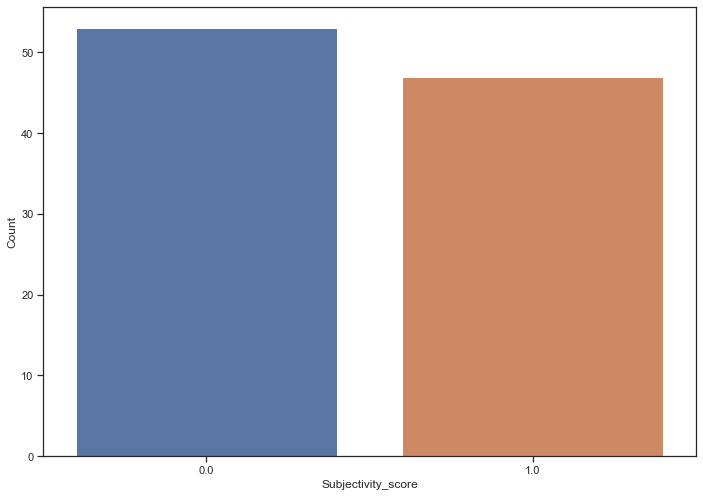

In [350]:
sns.set_theme(style="ticks")
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.countplot(data=df1, order=df1.subjectivity_score.value_counts().index, x='subjectivity_score')
ax.set(xlabel='Subjectivity_score', ylabel='Count')

In [355]:
df1['day_of_tweet'].value_counts()

Sunday       99
Wednesday     1
Name: day_of_tweet, dtype: int64

## __6.2 Most active day__

[Text(0.5, 0, 'Weekday'), Text(0, 0.5, 'Count')]

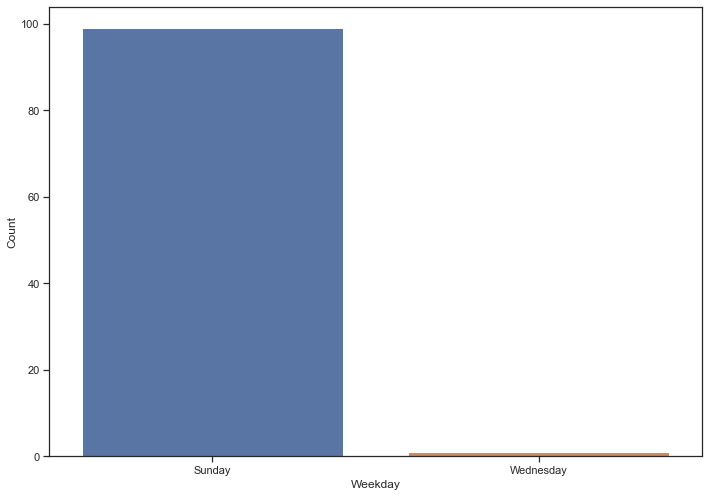

In [356]:
sns.set_theme(style="ticks")
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.countplot(data=df1, order=df1.day_of_tweet.value_counts().index, x='day_of_tweet')
ax.set(xlabel='Weekday', ylabel='Count')

## __6.3 Most active hours__

Text(0.5, 1.0, 'Time Vs tweet_counts')

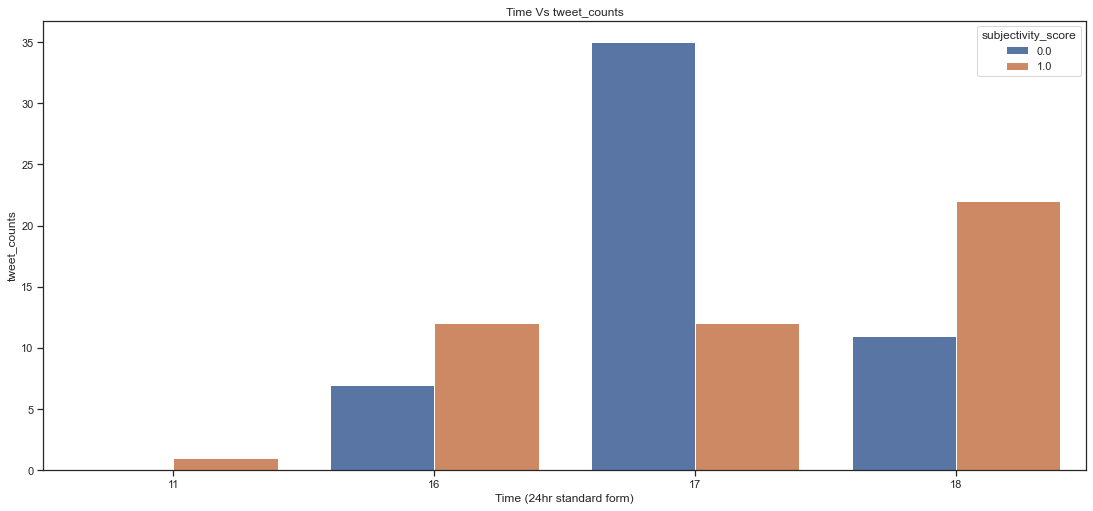

In [362]:
sns.set_theme(style="ticks")
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18.7, 8.27)
ax = sns.countplot(data=df1, hue="subjectivity_score", x= df1['created_at'].dt.hour)
ax.set(xlabel='Time (24hr standard form)', ylabel='tweet_counts')
ax.set_title('Time Vs tweet_counts')

## __6.4 Commonly used device__

[Text(0.5, 0, 'Weekday'), Text(0, 0.5, 'tweets')]

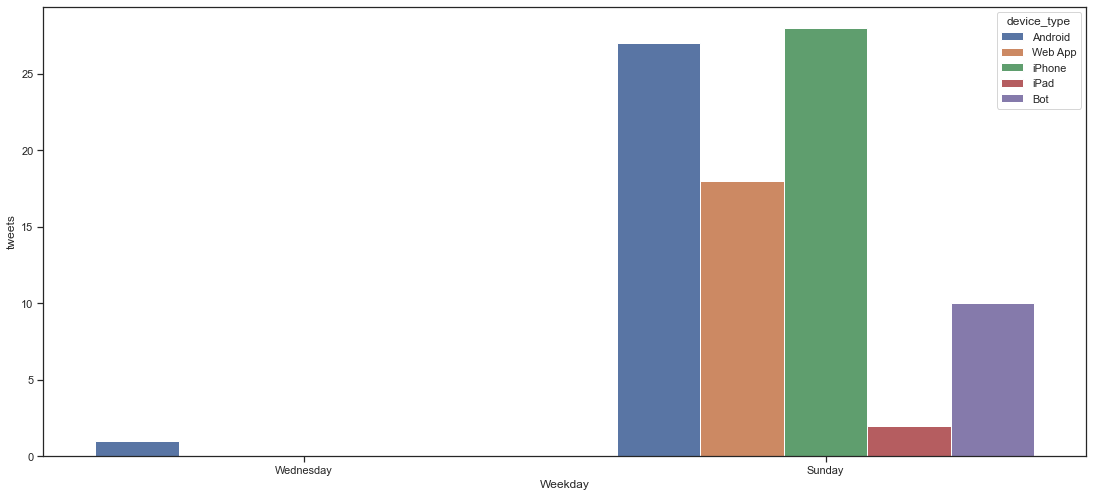

In [370]:
sns.set_theme(style="ticks")
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18.7, 8.27)
ax = sns.countplot(data=df1, hue="device_type", x= 'day_of_tweet')
ax.set(xlabel='Weekday', ylabel='tweets')

## __6.5 Time and device__

[Text(0.5, 0, 'Time (24hr standard form)'), Text(0, 0.5, 'tweets')]

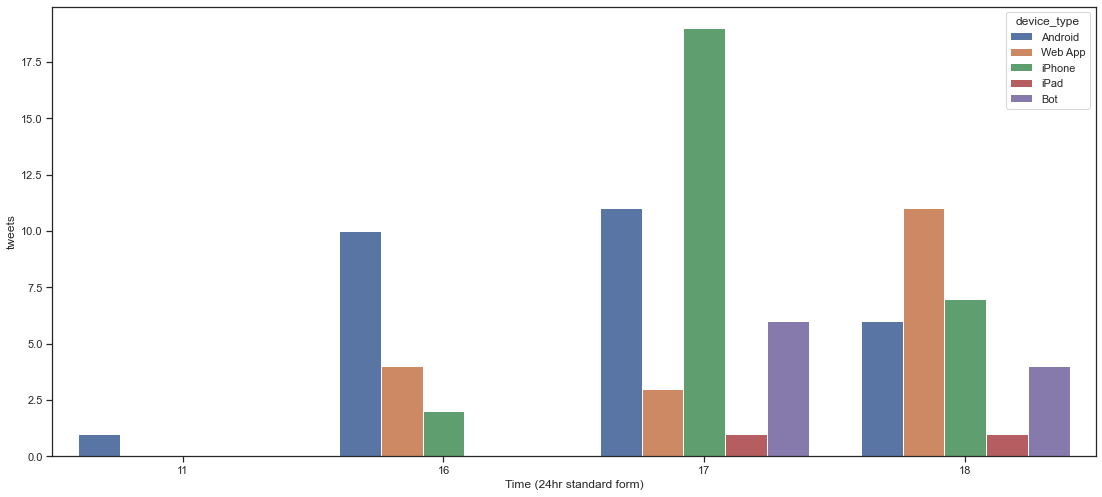

In [365]:
sns.set_theme(style="ticks")
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18.7, 8.27)
ax = sns.countplot(data=df1, hue="device_type", x= df1['created_at'].dt.hour)
ax.set(xlabel='Time (24hr standard form)', ylabel='tweets')

## __6.6 Device and subjectivity score__

[Text(0.5, 0, 'subjectivity_score'), Text(0, 0.5, 'count')]

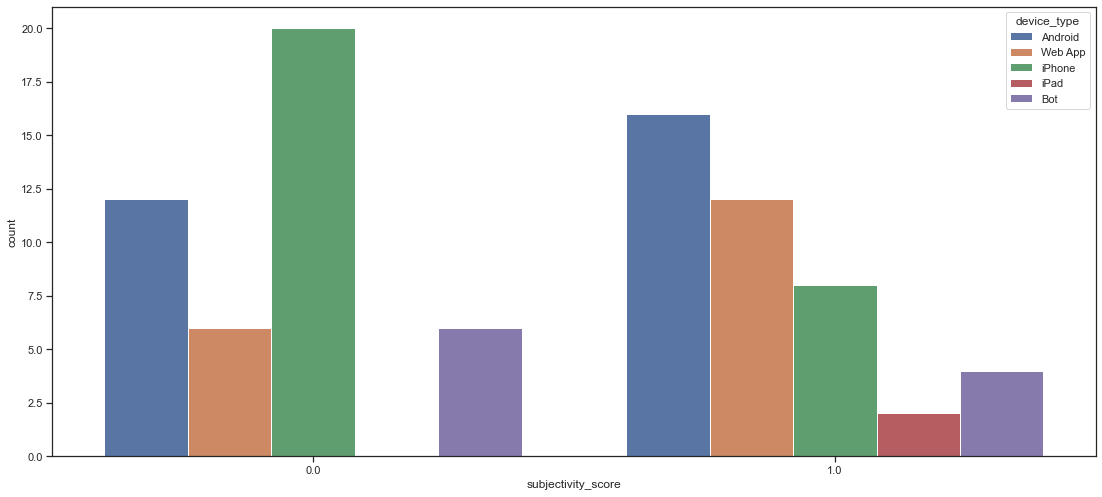

In [372]:
sns.set_theme(style="ticks")
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18.7, 8.27)
ax = sns.countplot(data=df1, hue="device_type", x= df1.subjectivity_score)
ax.set(xlabel='subjectivity_score', ylabel='count')

## __7. Visualizing the most commonly used words__

In [419]:
!pip install WordCloud

  Using cached wordcloud-1.8.1-cp38-cp38-win_amd64.whl (155 kB)


## __Visualizing the most frequently words__

- ### [Interpolation_types]('https://www.investopedia.com/terms/i/interpolation.asp')
- ### Investors use interpolation to create new estimated data points between known data points on a chart
- ### [__more_info__]('https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html')
- ### Random_state as the name suggests, is used for initializing the internal random number generator
    - ### which will decide the splitting of data into train and test indices in your case
    - ### interpolation - Interpolation is a method of creating new data points within the range of known data points (bilinear, bicubic, blackman)

In [424]:
score_1 = df1[df1['subjectivity_score'] == 1.0]
score_1.reset_index(drop= True, inplace = True)

In [429]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

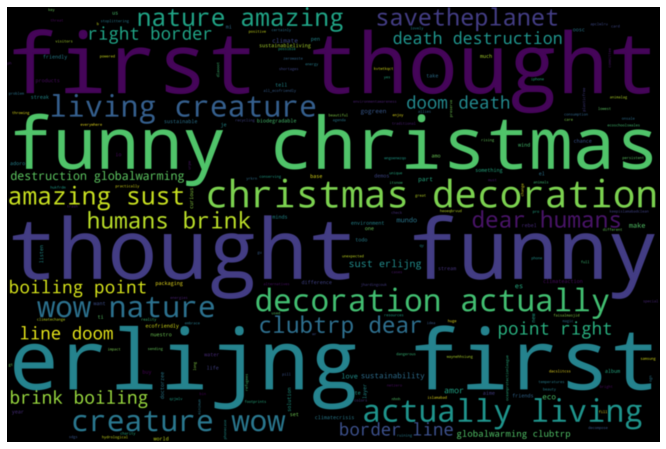

In [447]:
# bicubic interpolation

all_words = " ".join([sentence for sentence in score_1['Analysis']])   #it is big string consisting of all words together
from wordcloud import WordCloud

wordcloud = WordCloud(width = 3000, height = 2000,random_state = None, max_font_size = 500).generate(all_words)

# plot the graphs
plt.figure(figsize = (15,8))
plt.imshow(wordcloud, interpolation = 'bicubic')
plt.axis('off')
plt.show()


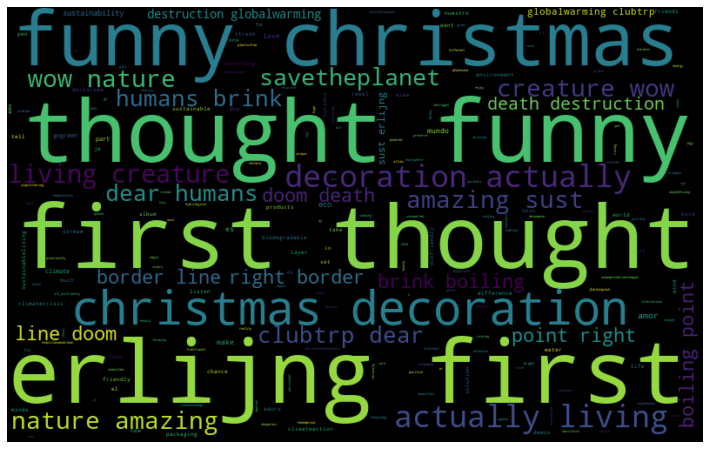

In [448]:
# bilinear interpolation

all_words = " ".join([sentence for sentence in score_1['Analysis']])   #it is big string consisting of all words together

from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 500, random_state = None, max_font_size = 100).generate(all_words)

# plot the graphs
plt.figure(figsize = (15,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

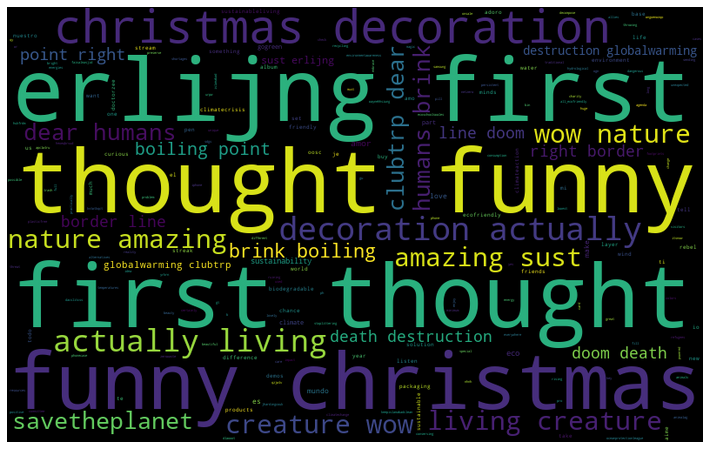

In [449]:
# blackman interpolation

all_words = " ".join([sentence for sentence in score_1['Analysis']])   #it is big string consisting of all words together

from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 500, random_state = None, max_font_size = 100).generate(all_words)

# plot the graphs
plt.figure(figsize = (15,8))
plt.imshow(wordcloud, interpolation = 'blackman')
plt.axis('off')
plt.show()

In [453]:
score_0 = df1[df1['subjectivity_score'] == 0.0]
score_0.reset_index(drop= True, inplace = True)

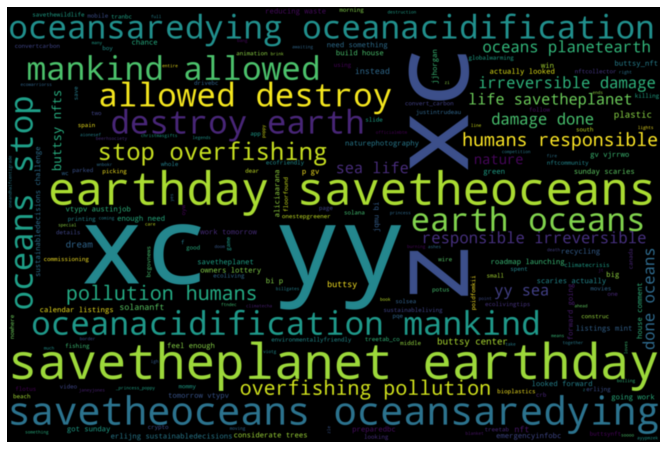

In [454]:
# bicubic interpolation

all_words = " ".join([sentence for sentence in score_0['Analysis']])   #it is big string consisting of all words together
from wordcloud import WordCloud

wordcloud = WordCloud(width = 3000, height = 2000,random_state = None, max_font_size = 500).generate(all_words)

# plot the graphs
plt.figure(figsize = (15,8))
plt.imshow(wordcloud, interpolation = 'bicubic')
plt.axis('off')
plt.show()

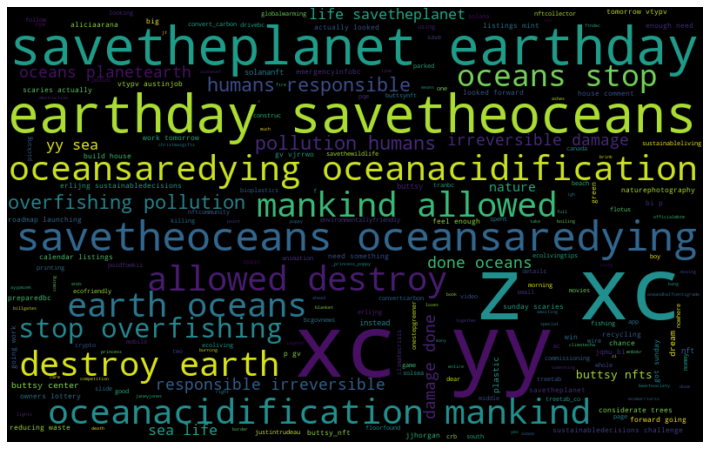

In [455]:
# bilinear interpolation

all_words = " ".join([sentence for sentence in score_0['Analysis']])   #it is big string consisting of all words together

from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 500, random_state = None, max_font_size = 100).generate(all_words)

# plot the graphs
plt.figure(figsize = (15,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

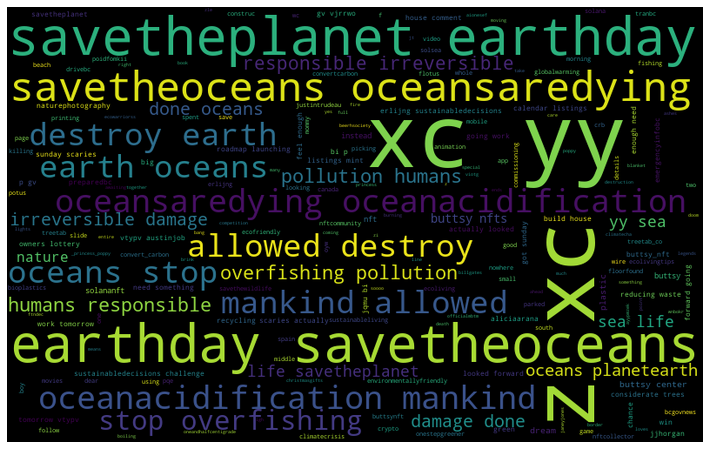

In [456]:
# blackman interpolation

all_words = " ".join([sentence for sentence in score_0['Analysis']])   #it is big string consisting of all words together

from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 500, random_state = None, max_font_size = 100).generate(all_words)

# plot the graphs
plt.figure(figsize = (15,8))
plt.imshow(wordcloud, interpolation = 'blackman')
plt.axis('off')
plt.show()

# __Conclusion__

-  ## From the analysis it is estimated that objective tweets are more on the topic of "savetheplanet"
-  ## It is observed that the iPhone and android are most commonly used device types.
-  ## Where sunday is the most active day and where evening 5:00 PM and 6:00 PM are maximum using time of the twitter.
-  ## Most objective tweets are from the iPhone user and where as more subjective tweets are from the Android users.
-  ## Common subjective words are funny, christmas, actually living, decoration
-  ## Where most common objective words are oceansaredying, savetheoceans, mankind, earthoceans

## In final conclusion in my words i would like to conclude that we are polluting the oceans at very high rate by dumping plastics, industrial and human waste, overfishing. Which results the distrubance in the ecosystem.